In [36]:
import pandas as pd
df=pd.read_csv("delay.csv")

In [37]:
# data insight
print(df.shape)

(2139, 21)


In [38]:
print(df.columns)

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')


In [39]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019,1,AS,Alaska Airlines Network,DCA,"Washington, DC: Ronald Reagan Washington National",155.0,19.0,5.15,0.38,...,0.0,2.58,0.0,0.0,561.0,195.0,12.0,275.0,0.0,79.0
1,2019,1,AS,Alaska Airlines Network,DEN,"Denver, CO: Denver International",138.0,19.0,3.54,0.00,...,0.0,5.91,0.0,0.0,673.0,225.0,0.0,322.0,0.0,126.0
2,2019,1,AS,Alaska Airlines Network,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",98.0,9.0,3.20,0.00,...,0.0,1.59,0.0,0.0,215.0,74.0,0.0,77.0,0.0,64.0
3,2019,1,AS,Alaska Airlines Network,DTW,"Detroit, MI: Detroit Metro Wayne County",31.0,1.0,0.00,0.00,...,0.0,0.00,0.0,0.0,142.0,0.0,0.0,142.0,0.0,0.0
4,2019,1,AS,Alaska Airlines Network,EWR,"Newark, NJ: Newark Liberty International",321.0,82.0,8.42,1.60,...,0.0,8.72,5.0,1.0,5872.0,869.0,38.0,4393.0,0.0,572.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 2139 non-null   int64  
 1   month                2139 non-null   int64  
 2   carrier              2139 non-null   object 
 3   carrier_name         2139 non-null   object 
 4   airport              2139 non-null   object 
 5   airport_name         2139 non-null   object 
 6   arr_flights          2135 non-null   float64
 7   arr_del15            2134 non-null   float64
 8   carrier_ct           2135 non-null   float64
 9   weather_ct           2135 non-null   float64
 10  nas_ct               2135 non-null   float64
 11  security_ct          2135 non-null   float64
 12  late_aircraft_ct     2135 non-null   float64
 13  arr_cancelled        2135 non-null   float64
 14  arr_diverted         2135 non-null   float64
 15  arr_delay            2135 non-null   f

In [41]:
df.describe

<bound method NDFrame.describe of       year  month carrier                 carrier_name airport  \
0     2019      1      AS      Alaska Airlines Network     DCA   
1     2019      1      AS      Alaska Airlines Network     DEN   
2     2019      1      AS      Alaska Airlines Network     DFW   
3     2019      1      AS      Alaska Airlines Network     DTW   
4     2019      1      AS      Alaska Airlines Network     EWR   
...    ...    ...     ...                          ...     ...   
2134  2019      1      ZW  Air Wisconsin Airlines Corp     STL   
2135  2019      1      ZW  Air Wisconsin Airlines Corp     SYR   
2136  2019      1      ZW  Air Wisconsin Airlines Corp     TUL   
2137  2019      1      ZW  Air Wisconsin Airlines Corp     TVC   
2138  2019      1      ZW  Air Wisconsin Airlines Corp     TYS   

                                           airport_name  arr_flights  \
0     Washington, DC: Ronald Reagan Washington National        155.0   
1                      Denver

In [42]:
# rates instead of abs counts
#delay rate 
df['delay_rate']=df['arr_del15']/df['arr_flights']*100

#cancellation rate
df['cancel_rate']=df['arr_cancelled']/df['arr_flights']*100

#diversion rate
df['divert_rate']=df['arr_diverted']/df['arr_del15']


In [43]:
#stats

#top 10 airlines by delay rate

top_delays=df.groupby('carrier_name')['delay_rate'].mean().sort_values(ascending=False)
print(top_delays.head(10))

#top airlines by cancellation rate

top_cancels=df.groupby('airport_name')['cancel_rate'].mean().sort_values(ascending=False)
print(top_cancels.head(10))


carrier_name
Peninsula Airways Inc.                       41.509434
Commutair Aka Champlain Enterprises, Inc.    36.587021
Hawaiian Airlines Network                    29.300568
Trans States Airlines                        28.684529
JetBlue Airways                              24.199070
GoJet Airlines LLC d/b/a United Express      24.195658
Frontier Airlines                            23.979119
ExpressJet Airlines Inc.                     23.580666
Air Wisconsin Airlines Corp                  22.871756
Compass Airlines                             22.088646
Name: delay_rate, dtype: float64
airport_name
Santa Fe, NM: Santa Fe Municipal                        33.633634
Watertown, NY: Watertown International                  25.806452
Muskegon, MI: Muskegon County                           24.193548
Quincy, IL: Quincy Regional-Baldwin Field               23.728814
Hancock/Houghton, MI: Houghton County Memorial          22.580645
North Bend/Coos Bay, OR: Southwest Oregon Regional      19.35

visualisation

In [44]:
# performance comparison

In [45]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14088\3986125973.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('carrier_name')['delay_rate'].mean().reset_index(),


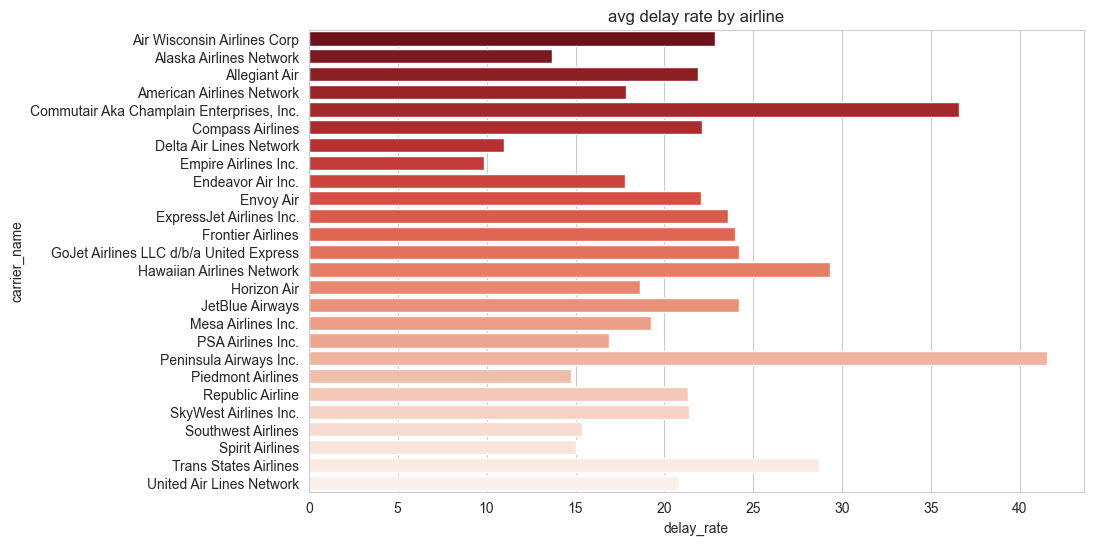

In [47]:
sns.barplot(data=df.groupby('carrier_name')['delay_rate'].mean().reset_index(), 
    x='delay_rate', y='carrier_name', palette='Reds_r')

plt.title("avg delay rate by airline")
plt.show()

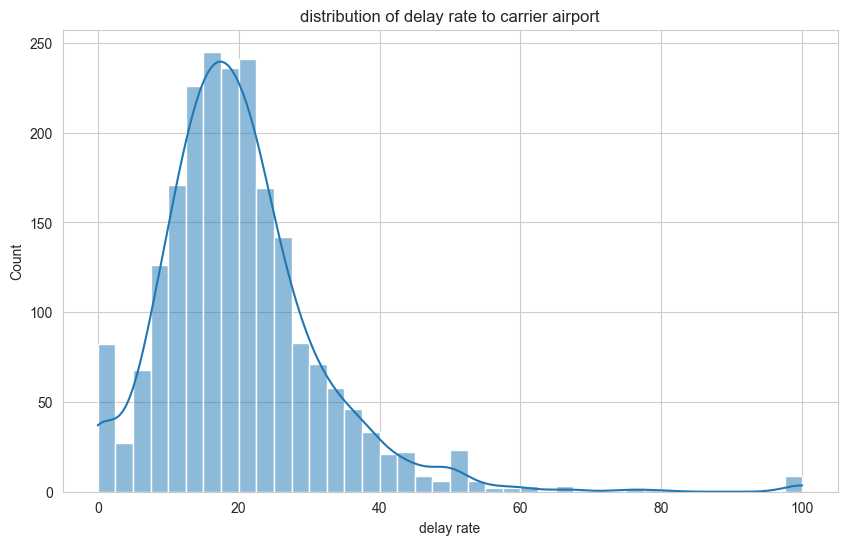

In [48]:
# delay rate hist
plt.figure()
sns.histplot(df['delay_rate'].dropna(),bins=40, kde=True)
plt.title('distribution of delay rate to carrier airport')
plt.xlabel("delay rate")
plt.show()

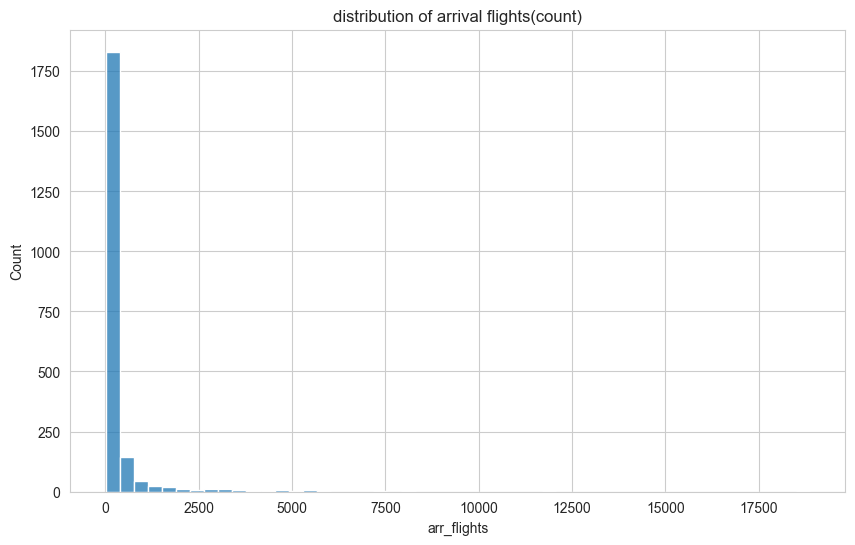

In [49]:
# arrival flights 
plt.figure()
sns.histplot(df['arr_flights'].dropna(), bins=50)
plt.title('distribution of arrival flights(count)')
plt.show()

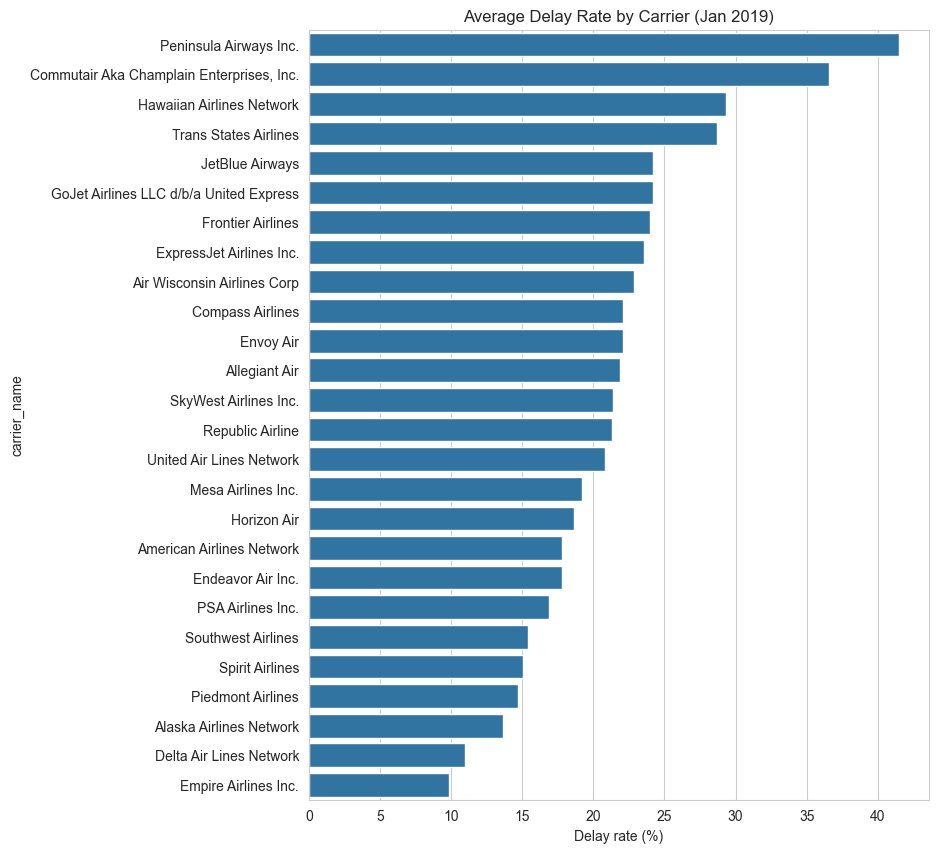

In [50]:
# delay rate per carrier
mean_delay_by_carrier = df.groupby('carrier_name')['delay_rate'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,10))
sns.barplot(x=mean_delay_by_carrier.values, y=mean_delay_by_carrier.index)
plt.title("Average Delay Rate by Carrier (Jan 2019)")
plt.xlabel("Delay rate (%)")
plt.show()

In [51]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


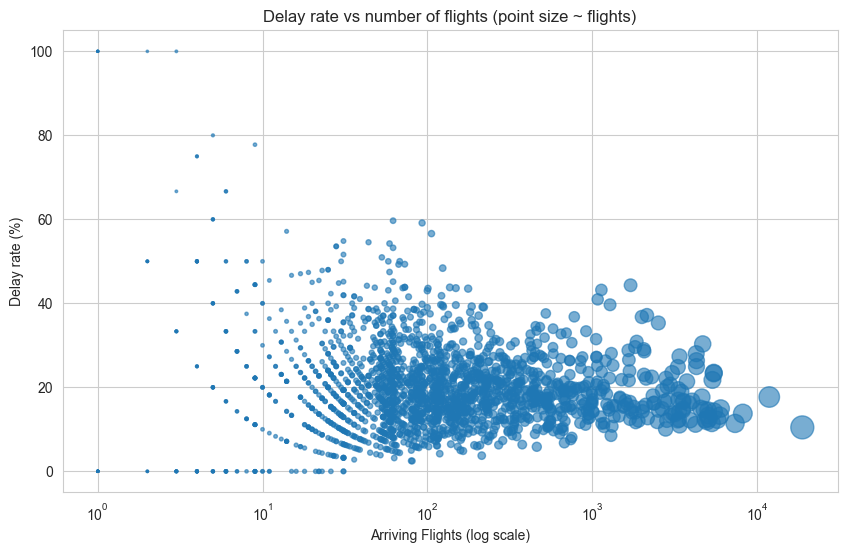

In [52]:
import numpy as np
plt.figure()
plt.scatter(df['arr_flights'], df['delay_rate'], s=np.sqrt(df['arr_flights'])*2, alpha=0.6)
plt.xscale('log')
plt.xlabel('Arriving Flights (log scale)')
plt.ylabel('Delay rate (%)')
plt.title('Delay rate vs number of flights (point size ~ flights)')
plt.show()


Delay Cause ( reason to delay)

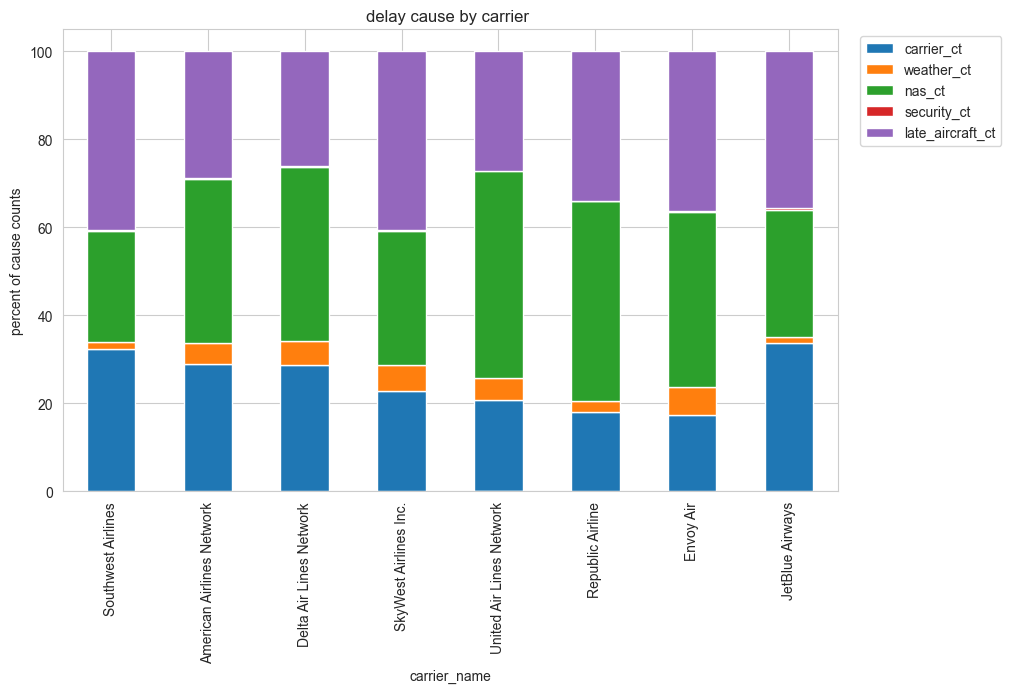

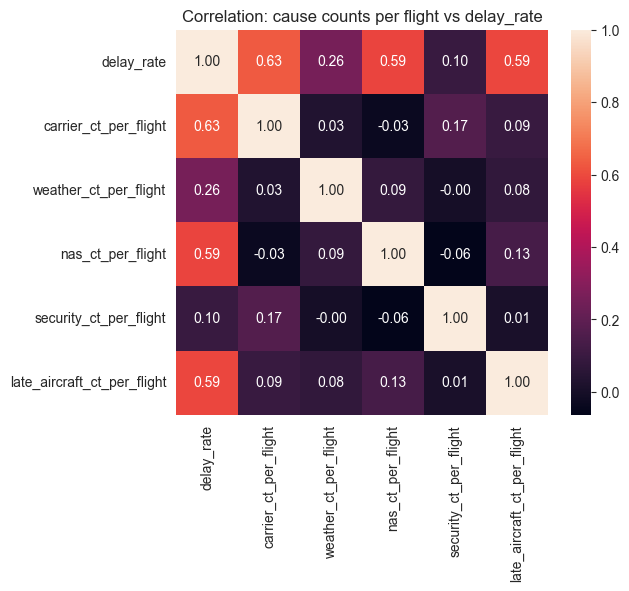

In [54]:
# normalized cause proportions
cause_ct_cols = ['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct']
df['total_cause_ct'] = df[cause_ct_cols].sum(axis=1)

# per-carrier aggregated proportion
agg = df.groupby('carrier_name')[cause_ct_cols].sum()
agg_norm = agg.div(agg.sum(axis=1), axis=0) * 100  # percent composition by carrier

# cause by top carriers (top 8 by flights)
top8_carriers = df.groupby('carrier_name')['arr_flights'].sum().nlargest(8).index
plot_df = agg_norm.loc[top8_carriers]

plot_df.plot(kind='bar', stacked=True, figsize=(10,6))
plt.ylabel("percent of cause counts")
plt.title("delay cause by carrier ")
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left')
plt.show()

# correlation between cause rates and overall delay_rate
for c in cause_ct_cols:
    df[c + '_per_flight'] = df[c] / df['arr_flights']

corr = df[['delay_rate'] + [c + '_per_flight' for c in cause_ct_cols]].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation: cause counts per flight vs delay_rate")
plt.show()



comparing delay_rate distributions across airports for two carriers. t test for normal approx

In [56]:
cA='Delta Air Line Inc.'
cB='United Air Lines Inc'

a = df[df['carrier_name']==cA]['delay_rate'].dropna()
b=df[df['carrier_name']==cB]['delay_rate'].dropna()

print('counts:', len(a), len(b))
# if sample size>=30 t test would be fine otherwise mann whitney
t_stat, p_val=stats.ttest_ind(a,b,equal_var=False, nan_policy='omit')
print('t-test:', len(a), len(b))

u_stat, p_u= stats.mannwhitneyu(a,b,alternative='two-sided')
print('mann-whitney U', u_stat,p_u)

counts: 0 0
t-test: 0 0
mann-whitney U nan nan


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14088\3155883256.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  u_stat, p_u= stats.mannwhitneyu(a,b,alternative='two-sided')


In [57]:
#chi square test to find if cancellation rates are different for diff carriers
ct = df.groupby('carrier_name')[['arr_cancelled','arr_flights']].sum()
ct['not_cancelled'] = ct['arr_flights'] - ct['arr_cancelled']
table = ct.loc[top8_carriers][['arr_cancelled','not_cancelled']].T.values  # shape 2 x K

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table)
print("chi2:", chi2, "p-value:", p)


chi2: 4932.571237659606 p-value: 0.0
